### Libraries

In [48]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString
from shapely.ops import nearest_points
from rtree import index
import numpy as np

### Loading Data

In [2]:
seccions = [
    4815075, 4815078, 4815079, 4815081, 4815083, 4815084, 4815085, 4815086, 4815087,
    4815090, 4815091, 4815096, 4815097, 4815098, 4815099, 4815425, 4815428, 4815429,
    4815440, 4815441
]

# Dictionary to store the GeoDataFrames
street_info_dict = {}

for sec in seccions:
    geojson_file_path_street = rf'C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\guadalahacks\datos\STREETS_NAV\SREETS_NAV_{sec}.geojson'
    try:
        street_info_dict[sec] = gpd.read_file(geojson_file_path_street)
    except Exception as e:
        print(f"Error reading file for section {sec}: {e}")

In [3]:
street_name_dict = {}

for sec in seccions:
    geojson_file_path_street_name = rf'c:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\guadalahacks\datos\STREETS_NAMING_ADDRESSING\SREETS_NAMING_ADDRESSING_{sec}.geojson'
    try:
        street_name_dict[sec] = gpd.read_file(geojson_file_path_street_name)
    except Exception as e:
        print(f"Error reading file for section {sec}: {e}")

In [4]:
merged_dict = {}

for sec in seccions:
    try:
        df_info = street_info_dict[sec]
        df_name = street_name_dict[sec]
        
        merged = df_info.merge(df_name, on='geometry', suffixes=('_info', '_name'))
        merged_dict[sec] = merged
        
    except Exception as e:
        print(f"Error merging section {sec}: {e}")

In [5]:
pois_dic = {}

for sec in seccions:
    try:
        pois_dic[sec] = pd.read_csv(rf'C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\guadalahacks\datos\POIs\POI_{sec}.csv')
    except Exception as e:
        print(f"Error reading POI file for section {sec}: {e}")

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_6152\1998206337.py:5: DtypeWarning: Columns (9,10,27) have mixed types. Specify dtype option on import or set low_memory=False.
  pois_dic[sec] = pd.read_csv(rf'C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\guadalahacks\datos\POIs\POI_{sec}.csv')
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_6152\1998206337.py:5: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  pois_dic[sec] = pd.read_csv(rf'C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\guadalahacks\datos\POIs\POI_{sec}.csv')


## Data Cleaning process

In [24]:
pois_dic[4815075].columns

Index(['Unnamed: 0', 'LINK_ID', 'POI_ID', 'SEQ_NUM', 'FAC_TYPE', 'POI_NAME',
       'POI_LANGCD', 'POI_NMTYPE', 'POI_ST_NUM', 'ST_NUM_FUL', 'ST_NFUL_LC',
       'ST_NAME', 'ST_LANGCD', 'POI_ST_SD', 'ACC_TYPE', 'PH_NUMBER',
       'CHAIN_ID', 'NAT_IMPORT', 'PRIVATE', 'IN_VICIN', 'NUM_PARENT',
       'NUM_CHILD', 'PERCFRREF', 'VANCITY_ID', 'ACT_ADDR', 'ACT_LANGCD',
       'ACT_ST_NAM', 'ACT_ST_NUM', 'ACT_ADMIN', 'ACT_POSTAL', 'AIRPT_TYPE',
       'ENTR_TYPE', 'REST_TYPE', 'FOOD_TYPE', 'ALT_FOOD', 'REG_FOOD',
       'RSTR_TYPE', 'OPEN_24', 'DIESEL', 'BLD_TYPE'],
      dtype='object')

### prueba

lets analyze the first df just to confirm 

In [6]:
df_4815075 = merged_dict[4815075]
df_4815075

,AR_AUTO,AR_BUS,AR_CARPOOL,AR_DELIV,AR_EMERVEH,AR_MOTOR,AR_PEDEST,AR_TAXIS,AR_TRAFF,AR_TRUCKS,...,R_ADDRSCH,R_NREFADDR,R_REFADDR,ST_LANGCD,ST_NAME,ST_NM_BASE,ST_NM_SUFF,ST_TYP_AFT,ST_TYP_ATT,ST_TYP_BEF
0,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,E,672,30,SPA,CALLE MARIANO ZÚÑIGA,MARIANO ZÚÑIGA,None,None,N,CALLE
1,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,O,101,125,SPA,CALLE CARLOTA,CARLOTA,None,None,N,CALLE
2,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,None,None,None,None,None,None,None,None,N,None
3,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,None,None,None,None,None,None,None,None,N,None
4,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,O,121,139,SPA,CALLE ANA MARÍA,ANA MARÍA,None,None,N,CALLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,None,None,None,None,None,None,None,None,N,None
31202,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,None,None,None,SPA,AVENIDA SAN ISIDRO,SAN ISIDRO,None,None,N,AVENIDA
31203,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,...,None,None,None,SPA,AUTOPISTA TOLUCA-NAUCALPAN,TOLUCA-NAUCALPAN,None,None,N,AUTOPISTA
31204,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,None,None,None,None,None,None,None,None,N,None


In [7]:
df_4815075.columns

Index(['AR_AUTO', 'AR_BUS', 'AR_CARPOOL', 'AR_DELIV', 'AR_EMERVEH', 'AR_MOTOR',
       'AR_PEDEST', 'AR_TAXIS', 'AR_TRAFF', 'AR_TRUCKS', 'BRIDGE', 'CONTRACC',
       'COVERIND', 'DIR_TRAVEL', 'DIVIDER', 'FERRY_TYPE', 'FROM_LANES',
       'FRONTAGE', 'FR_SPD_LIM', 'FUNC_CLASS', 'INDESCRIB', 'INTERINTER',
       'LANE_CAT', 'link_id_info', 'LOW_MBLTY', 'MANOEUVRE', 'MULTIDIGIT',
       'PAVED', 'POIACCESS', 'PRIORITYRD', 'PRIVATE', 'PUB_ACCESS', 'RAMP',
       'ROUNDABOUT', 'SPEED_CAT', 'TOLLWAY', 'TO_LANES', 'TO_SPD_LIM',
       'TUNNEL', 'UNDEFTRAFF', 'URBAN', 'geometry', 'ADDR_TYPE',
       'link_id_name', 'L_ADDRFORM', 'L_ADDRSCH', 'L_NREFADDR', 'L_REFADDR',
       'R_ADDRFORM', 'R_ADDRSCH', 'R_NREFADDR', 'R_REFADDR', 'ST_LANGCD',
       'ST_NAME', 'ST_NM_BASE', 'ST_NM_SUFF', 'ST_TYP_AFT', 'ST_TYP_ATT',
       'ST_TYP_BEF'],
      dtype='object')

* para poder hacer el merge, cambiemos el nombre de link_id_info a LINK_ID (el mismo que el de pois)

In [8]:
df_4815075.rename(columns = {"link_id_info": "LINK_ID"}, inplace= True)

In [9]:
df_4815075["MULTIDIGIT"].value_counts()

MULTIDIGIT
N    29082
Y     2124
Name: count, dtype: int64

In [10]:
# lest just keep with the links which are multidigit == Y for each data
df_4815075 = df_4815075[df_4815075["MULTIDIGIT"] == "Y"]

In [11]:
df_4815075[df_4815075["LINK_ID"] == 1296526969]

,AR_AUTO,AR_BUS,AR_CARPOOL,AR_DELIV,AR_EMERVEH,AR_MOTOR,AR_PEDEST,AR_TAXIS,AR_TRAFF,AR_TRUCKS,...,R_ADDRSCH,R_NREFADDR,R_REFADDR,ST_LANGCD,ST_NAME,ST_NM_BASE,ST_NM_SUFF,ST_TYP_AFT,ST_TYP_ATT,ST_TYP_BEF
306,Y,Y,Y,N,Y,Y,Y,Y,Y,N,...,None,None,None,SPA,AVENIDA SOLIDARIDAD LAS TORRES,SOLIDARIDAD LAS TORRES,None,None,N,AVENIDA


* ahora llamemos el df de los POIs

In [12]:
df_pois_4815075 = pois_dic[4815075]

In [13]:
columns_pois = ["LINK_ID", "POI_ID", "FAC_TYPE", "POI_NAME", "POI_ST_NUM"]

In [14]:
df_pois_4815075 = df_pois_4815075[columns_pois]
df_pois_4815075.head(4)

,LINK_ID,POI_ID,FAC_TYPE,POI_NAME,POI_ST_NUM
0,1296526969,1244439551,4013,TOLUCA CENTRO,NaN
1,702722866,1244248545,9535,MISCELÁNEA,144.0
2,702722866,1178939983,9535,TIENDA DE ABARROTES,NaN
3,1296526966,1244944824,4013,TOLUCA CENTRO,NaN


In [15]:
df_pois_4815075.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7232 entries, 0 to 7231
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LINK_ID     7232 non-null   int64  
 1   POI_ID      7232 non-null   int64  
 2   FAC_TYPE    7232 non-null   int64  
 3   POI_NAME    7232 non-null   object 
 4   POI_ST_NUM  676 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 282.6+ KB


In [16]:
df_pois_4815075[df_pois_4815075["LINK_ID"] == 1296526969]

,LINK_ID,POI_ID,FAC_TYPE,POI_NAME,POI_ST_NUM
0,1296526969,1244439551,4013,TOLUCA CENTRO,NaN


In [17]:
df_4815075[df_4815075["LINK_ID"] == 1296526969]

,AR_AUTO,AR_BUS,AR_CARPOOL,AR_DELIV,AR_EMERVEH,AR_MOTOR,AR_PEDEST,AR_TAXIS,AR_TRAFF,AR_TRUCKS,...,R_ADDRSCH,R_NREFADDR,R_REFADDR,ST_LANGCD,ST_NAME,ST_NM_BASE,ST_NM_SUFF,ST_TYP_AFT,ST_TYP_ATT,ST_TYP_BEF
306,Y,Y,Y,N,Y,Y,Y,Y,Y,N,...,None,None,None,SPA,AVENIDA SOLIDARIDAD LAS TORRES,SOLIDARIDAD LAS TORRES,None,None,N,AVENIDA


In [18]:
# hacemos el merge
prueba = df_4815075.merge(df_pois_4815075, on="LINK_ID", how="left")


In [19]:
prueba[prueba["LINK_ID"] == 702722866]

,AR_AUTO,AR_BUS,AR_CARPOOL,AR_DELIV,AR_EMERVEH,AR_MOTOR,AR_PEDEST,AR_TAXIS,AR_TRAFF,AR_TRUCKS,...,ST_NAME,ST_NM_BASE,ST_NM_SUFF,ST_TYP_AFT,ST_TYP_ATT,ST_TYP_BEF,POI_ID,FAC_TYPE,POI_NAME,POI_ST_NUM
49,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,...,CALLE GLORIA,GLORIA,None,None,N,CALLE,1.244249e+09,9535.0,MISCELÁNEA,144.0
50,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,...,CALLE GLORIA,GLORIA,None,None,N,CALLE,1.178940e+09,9535.0,TIENDA DE ABARROTES,NaN


In [20]:
prueba.columns

Index(['AR_AUTO', 'AR_BUS', 'AR_CARPOOL', 'AR_DELIV', 'AR_EMERVEH', 'AR_MOTOR',
       'AR_PEDEST', 'AR_TAXIS', 'AR_TRAFF', 'AR_TRUCKS', 'BRIDGE', 'CONTRACC',
       'COVERIND', 'DIR_TRAVEL', 'DIVIDER', 'FERRY_TYPE', 'FROM_LANES',
       'FRONTAGE', 'FR_SPD_LIM', 'FUNC_CLASS', 'INDESCRIB', 'INTERINTER',
       'LANE_CAT', 'LINK_ID', 'LOW_MBLTY', 'MANOEUVRE', 'MULTIDIGIT', 'PAVED',
       'POIACCESS', 'PRIORITYRD', 'PRIVATE', 'PUB_ACCESS', 'RAMP',
       'ROUNDABOUT', 'SPEED_CAT', 'TOLLWAY', 'TO_LANES', 'TO_SPD_LIM',
       'TUNNEL', 'UNDEFTRAFF', 'URBAN', 'geometry', 'ADDR_TYPE',
       'link_id_name', 'L_ADDRFORM', 'L_ADDRSCH', 'L_NREFADDR', 'L_REFADDR',
       'R_ADDRFORM', 'R_ADDRSCH', 'R_NREFADDR', 'R_REFADDR', 'ST_LANGCD',
       'ST_NAME', 'ST_NM_BASE', 'ST_NM_SUFF', 'ST_TYP_AFT', 'ST_TYP_ATT',
       'ST_TYP_BEF', 'POI_ID', 'FAC_TYPE', 'POI_NAME', 'POI_ST_NUM'],
      dtype='object')

### con todos los df

In [21]:
columns_pois = ["LINK_ID", "POI_ID", "FAC_TYPE", "POI_NAME", "POI_ST_NUM", "PERCFRREF"]
df_mm_sections = {}

In [22]:
for sec in seccions:
    try:
        # 1. we changed the link columns from the streets df so 
        # we can merge with the POI data
        df_strets = merged_dict[sec].copy()
        df_strets.rename(columns = {"link_id_info": "LINK_ID"}, inplace = True)
        
        
        # -> MULTIDIGIT STREETS DISTRIBUTION BEFORE FILTERING
        print(f"\n Seccion {sec} - MULTIDIGIT DISTRIBUTION BEFORE FILTERING")
        print(df_strets["MULTIDIGIT"].value_counts())
        
        
        # 2. we filter by only having multidigit streets
        df_strets = df_strets[df_strets["MULTIDIGIT"] == "Y"]
        
        
        # 3. we get only the deseareble columns in the POIs data
        df_pois = pois_dic[sec].copy()
        df_pois = df_pois[columns_pois]
        
        for col in ["LINK_ID", "POI_ID", "FAC_TYPE", "POI_ST_NUM"]:
            df_pois[col] = pd.to_numeric(df_pois[col], errors = "coerce").astype("Int64")
            
        # we mantain the poi name column as string
        df_pois["POI_NAME"] = df_pois["POI_NAME"].astype(str)
        
        # 4. merge 
        df_merge = df_strets.merge(df_pois, on = "LINK_ID", how = "left")
        
        # 6. save it on the final dicc
        df_mm_sections[sec] = df_merge
        
    except Exception as e:
        print(f"Error procesando sección {sec}: {e}")



 Seccion 4815075 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    29082
Y     2124
Name: count, dtype: int64

 Seccion 4815078 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    7236
Y     546
Name: count, dtype: int64

 Seccion 4815079 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    33488
Y     2852
Name: count, dtype: int64

 Seccion 4815081 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    24561
Y      861
Name: count, dtype: int64

 Seccion 4815083 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    4004
Name: count, dtype: int64

 Seccion 4815084 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    13482
Y      201
Name: count, dtype: int64

 Seccion 4815085 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    105309
Y     16337
Name: count, dtype: int64

 Seccion 4815086 - MULTIDIGIT DISTRIBUTION BEFORE FILTERING
MULTIDIGIT
N    12601
Y      171
Name: count, dtype: int64

 Seccion 4815087 - MULTIDIGIT DISTRIBUTION BEFORE F

## Casos de analisis

### caso 1

In [59]:
def classify_non_existent_pois(df_mm_sections):
    non_existent_results = {}

    for sec, df in df_mm_sections.items():
        # Filtramos solo las filas con al menos un POI válido
        df_filtered = df[df["POI_ID"].notna()].copy()

        # Creamos columna vacía para la clasificación
        df_filtered["POI_STATUS"] = "Valid"
        df_filtered["MARKED_FOR_DELETION"] = False


        # Caso 1: ST_TYP_BEF ≠ ST_TYP_AFT
        cond_type_changed = df_filtered["ST_TYP_BEF"] != df_filtered["ST_TYP_AFT"]

        # Caso 2: MULTIDIGIT + (BRIDGE o TUNNEL o RAMP)
        cond_infra_issue = (
            (df_filtered["MULTIDIGIT"] == "Y") &
            (
                (df_filtered["BRIDGE"] == "Y") |
                (df_filtered["TUNNEL"] == "Y") |
                (df_filtered["RAMP"] == "Y")
            )
        )

        # Aplicamos ambas condiciones
        df_filtered.loc[cond_type_changed & cond_infra_issue, "POI_STATUS"] = "Non Existent POI"
        #df_filtered.loc[cond_non_existent, "MARKED_FOR_DELETION"] = True

        # Guardamos resultados por sección
        non_existent_results[sec] = df_filtered

    return non_existent_results

classified_poi_dict = classify_non_existent_pois(df_mm_sections)

# Verificar resultados
for sec, df in classified_poi_dict.items():
    print(f"\nSección {sec} - Conteo de clasificaciones:")
    print(df["POI_STATUS"].value_counts())


Sección 4815075 - Conteo de clasificaciones:
POI_STATUS
Valid    1095
Name: count, dtype: int64

Sección 4815078 - Conteo de clasificaciones:
POI_STATUS
Valid    11
Name: count, dtype: int64

Sección 4815079 - Conteo de clasificaciones:
POI_STATUS
Valid               1186
Non Existent POI       1
Name: count, dtype: int64

Sección 4815081 - Conteo de clasificaciones:
POI_STATUS
Valid    197
Name: count, dtype: int64

Sección 4815083 - Conteo de clasificaciones:
Series([], Name: count, dtype: int64)

Sección 4815084 - Conteo de clasificaciones:
Series([], Name: count, dtype: int64)

Sección 4815085 - Conteo de clasificaciones:
POI_STATUS
Valid               8707
Non Existent POI       2
Name: count, dtype: int64

Sección 4815086 - Conteo de clasificaciones:
POI_STATUS
Valid    10
Name: count, dtype: int64

Sección 4815087 - Conteo de clasificaciones:
POI_STATUS
Valid    1996
Name: count, dtype: int64

Sección 4815090 - Conteo de clasificaciones:
POI_STATUS
Valid    3004
Name: count, dt

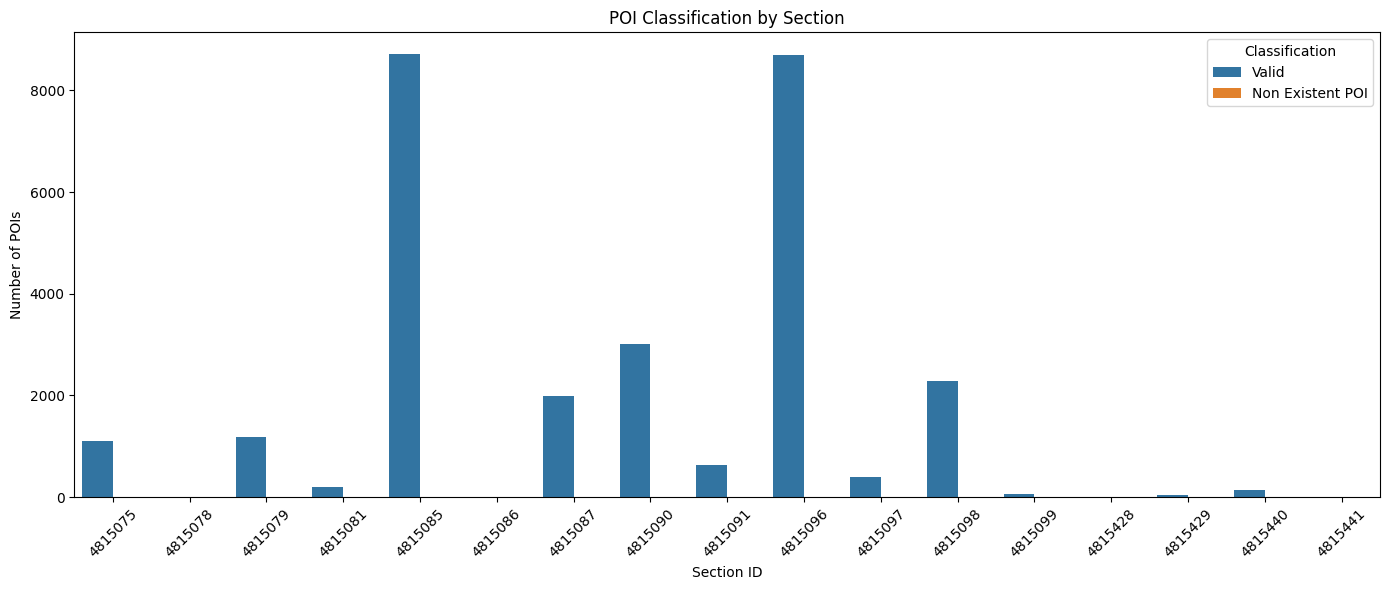

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Unimos los resultados en un solo DataFrame
df_all = pd.concat(classified_poi_dict.values(), keys=classified_poi_dict.keys(), names=["Section", "Index"]).reset_index()

# Conteo por sección y clasificación
count_df = df_all.groupby(["Section", "POI_STATUS"]).size().reset_index(name="Count")

# Gráfico de barras agrupado
plt.figure(figsize=(14, 6))
sns.barplot(data=count_df, x="Section", y="Count", hue="POI_STATUS")
plt.xticks(rotation=45)
plt.title("POI Classification by Section")
plt.ylabel("Number of POIs")
plt.xlabel("Section ID")
plt.legend(title="Classification")
plt.tight_layout()
plt.show()

In [61]:
# Porcentaje por sección
percentage_by_section = (
    count_df[count_df["POI_STATUS"] == "Non Existent POI"]
    .set_index("Section")[["Count"]]
    .div(count_df.groupby("Section")["Count"].sum(), axis=0) * 100
).reset_index()

percentage_by_section.rename(columns={"Count": "Percentage_Non_Existent_POI"}, inplace=True)
print(percentage_by_section)


    Section  Percentage_Non_Existent_POI
0   4815075                          NaN
1   4815078                          NaN
2   4815079                     0.084246
3   4815081                          NaN
4   4815085                     0.022965
5   4815086                          NaN
6   4815087                          NaN
7   4815090                          NaN
8   4815091                          NaN
9   4815096                     0.011486
10  4815097                          NaN
11  4815098                          NaN
12  4815099                          NaN
13  4815428                          NaN
14  4815429                          NaN
15  4815440                          NaN
16  4815441                          NaN


### caso 3

In [53]:
import numpy as np
from shapely.geometry import LineString
from shapely.ops import nearest_points
from rtree import index
from math import radians, cos, sin, asin, sqrt

# Haversine distance (metros)
def haversine(p1, p2):
    lon1, lat1 = p1
    lon2, lat2 = p2

    # Convertir grados a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371000  # Radio de la Tierra en metros
    return c * r

# Dirección de línea
def calculate_direction(coord1, coord2):
    dx = coord2[0] - coord1[0]
    dy = coord2[1] - coord1[1]
    return np.arctan2(dy, dx)

# Son paralelas
def are_lines_parallel(line1, line2, tolerance=0.1):
    if isinstance(line1, LineString) and isinstance(line2, LineString):
        coords1 = list(line1.coords)
        coords2 = list(line2.coords)
        dirs1 = [calculate_direction(coords1[i], coords1[i+1]) for i in range(len(coords1)-1)]
        dirs2 = [calculate_direction(coords2[i], coords2[i+1]) for i in range(len(coords2)-1)]
        return abs(np.mean(dirs1) - np.mean(dirs2)) < tolerance
    return False

# Distancia mínima en metros entre líneas
def calculate_distance_meters(line1, line2):
    if isinstance(line1, LineString) and isinstance(line2, LineString):
        p1, p2 = nearest_points(line1, line2)
        return haversine(p1.coords[0], p2.coords[0])
    return None

# Función principal
def find_parallel_link_ids_with_distances_optimized(df, tolerance=0.1):
    parallel_link_dict = {}
    spatial_index = index.Index()

    for idx, row in df.iterrows():
        spatial_index.insert(idx, row["geometry"].bounds)

    for idx1, row1 in df.iterrows():
        possible_matches_index = list(spatial_index.intersection(row1["geometry"].bounds))
        for idx2 in possible_matches_index:
            if idx1 >= idx2:
                continue
            row2 = df.iloc[idx2]
            if row1["LINK_ID"] != row2["LINK_ID"]:
                if are_lines_parallel(row1["geometry"], row2["geometry"], tolerance):
                    distance_m = calculate_distance_meters(row1["geometry"], row2["geometry"])
                    # Evitar duplicados cruzados
                    if (row1["LINK_ID"] not in parallel_link_dict 
                        and row2["LINK_ID"] not in parallel_link_dict):
                        parallel_link_dict[row1["LINK_ID"]] = {
                            "parallel_to": row2["LINK_ID"],
                            "distance_meters": distance_m
                        }
    return parallel_link_dict

# Ejecutar
parallel_link_dict = find_parallel_link_ids_with_distances_optimized(prueba, tolerance=0.1)

# Ver ejemplo de salida
from pprint import pprint
pprint(parallel_link_dict)


{702646431: {'distance_meters': 0.0, 'parallel_to': 1295322027},
 702651929: {'distance_meters': 0.0, 'parallel_to': 1073188359},
 702651934: {'distance_meters': 0.0, 'parallel_to': 1296128094},
 702655735: {'distance_meters': 0.0, 'parallel_to': 702679773},
 702655737: {'distance_meters': 0.0, 'parallel_to': 702677999},
 702655739: {'distance_meters': 0.0, 'parallel_to': 702661350},
 702655999: {'distance_meters': 0.0, 'parallel_to': 1336033406},
 702656000: {'distance_meters': 0.0, 'parallel_to': 1336033408},
 702657550: {'distance_meters': 0.0, 'parallel_to': 711775064},
 702659496: {'distance_meters': 0.0, 'parallel_to': 836071521},
 702659542: {'distance_meters': 0.0, 'parallel_to': 839667178},
 702659566: {'distance_meters': 0.0, 'parallel_to': 702661337},
 702659583: {'distance_meters': 0.0, 'parallel_to': 1209176169},
 702659595: {'distance_meters': 0.0, 'parallel_to': 1128581599},
 702661350: {'distance_meters': 0.0, 'parallel_to': 702677996},
 702661357: {'distance_meters': 0